Pandas & Seaborn
Contexto: Iremos simular a realização de uma prova de redação em nível nacional. Sendo assim:

1. Crie um data frame pandas com 1000 amostras em cada uma das seguintes colunas:
   1. Idade: números inteiros aleatórios entre 0 e 100 (inclusos).
   1. Data: datas aleatórias entre 01/01/2000 até 31/01/2000.
   1. Nota: Números decimais entre 0 e 1000.
   1. Sexo: Valores aleatórios de M ou F
   1. Estado: Valores aleatórios entre os estados do Brasil.
1. Utilizando pandas, realize as seguintes alterações no dataset:
   1. Transforme 20% das notas em valores nulos, simulando alunos que não compareceram à prova.
   1. Preencha as notas nulas com valor 0, simulando uma atribuição automática do sistema.
   1. Remova alunos com idades inferiores a 18 e superiores a 80, simulando uma filtragem automática do sistema para alunos com idades incosistentes.
   1. Crie um novo campo de aprovado para os alunos restantes que obtiveram nota igual ou superior a 600. Simulando uma correção automática.
   1. Crie um campo novo indicando o dia da semana para todas as datas.
1. Gere um relatório com os seguintes tópicos:
   1. Tabela cruzada de participantes de cada sexo por estado.
   1. Gráfico de pizza da quantidade de aprovados por sexo, e um de barras com a quantidade de aprovados por estado.
   1. Gráfico de pontos de nota por idade, colorindo por sexo.
    1. Gráfico de barras com a participação por dia da semana e por dia do mês.
    1. Gráfico de pontos das notas por dia da semana
1. Salve um arquivo csv com as notas dos 100 melhores alunos ordenados da melhor nota para a pior


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
seed = 0
amostras = 1000

np.random.seed(seed)

estados = [
  'AC', 'AL', 'AP',
  'AM', 'BA', 'CE',
  'ES', 'GO', 'MA',
  'MT', 'MS', 'MG',
  'PA', 'PB', 'PR',
  'PE', 'PI', 'RJ',
  'RN', 'RS', 'RO',
  'RR', 'SC', 'SP',
  'SE', 'TO', 'DF',
]

df = pd.DataFrame({
  'idade': np.random.randint(0,100, size= amostras),
  'data': np.random.choice(pd.date_range('2000-01-01', '2000-01-31'), size=amostras),
  'nota': np.random.uniform(0,1000, amostras),
  'sexo': np.random.choice(['M', 'F'], size=amostras),
  'estado': np.random.choice(estados, size=amostras) 
})

In [3]:
df.loc[df.index.to_series().sample(frac=.2, random_state=seed), 'nota'] = np.nan
df.nota.isna().value_counts()
df.nota.fillna(0, inplace=True)
gt_18 = df.idade > 18
lt_80 = df.idade < 80
filtro = gt_18 & lt_80
df = df[filtro]
df['aprovado'] = df.nota >= 600
df

,idade,data,nota,sexo,estado,aprovado
0,44,2000-01-05,268.709029,M,PI,False
1,47,2000-01-19,0.000000,F,AP,False
2,64,2000-01-24,955.568394,M,DF,True
3,67,2000-01-22,316.550210,M,MS,False
4,67,2000-01-31,826.805270,F,GO,True
...,...,...,...,...,...,...
993,33,2000-01-14,0.000000,M,PE,False
995,26,2000-01-05,847.739332,F,MT,True
996,48,2000-01-23,0.000000,M,PB,False
997,71,2000-01-21,713.246013,M,ES,True


In [4]:
df['dia_semana'] = df.data.dt.weekday
mapa = {
    0:'Segunda',
    1:'Terça',
    2:'Quarta',
    3:'Quinta',
    4:'Sexta',
    5:'Sábado',
    6:'Domingo',
}
df['dia_semana'] = df['dia_semana'].map(mapa)
df

,idade,data,nota,sexo,estado,aprovado,dia_semana
0,44,2000-01-05,268.709029,M,PI,False,Quarta
1,47,2000-01-19,0.000000,F,AP,False,Quarta
2,64,2000-01-24,955.568394,M,DF,True,Segunda
3,67,2000-01-22,316.550210,M,MS,False,Sábado
4,67,2000-01-31,826.805270,F,GO,True,Segunda
...,...,...,...,...,...,...,...
993,33,2000-01-14,0.000000,M,PE,False,Sexta
995,26,2000-01-05,847.739332,F,MT,True,Quarta
996,48,2000-01-23,0.000000,M,PB,False,Domingo
997,71,2000-01-21,713.246013,M,ES,True,Sexta


In [5]:
df.shape

(606, 7)

In [6]:
pd.crosstab(df.estado, df.sexo)

sexo,F,M
estado,,
AC,13,12
AL,7,16
AM,8,12
AP,15,11
BA,13,11
CE,20,14
DF,10,10
ES,13,13
GO,20,11


[]

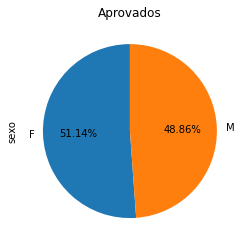

In [16]:
df[df.aprovado].sexo.value_counts().plot(kind='pie', autopct='%.2f%%',startangle=90)
plt.title('Aprovados')
plt.plot()

[]

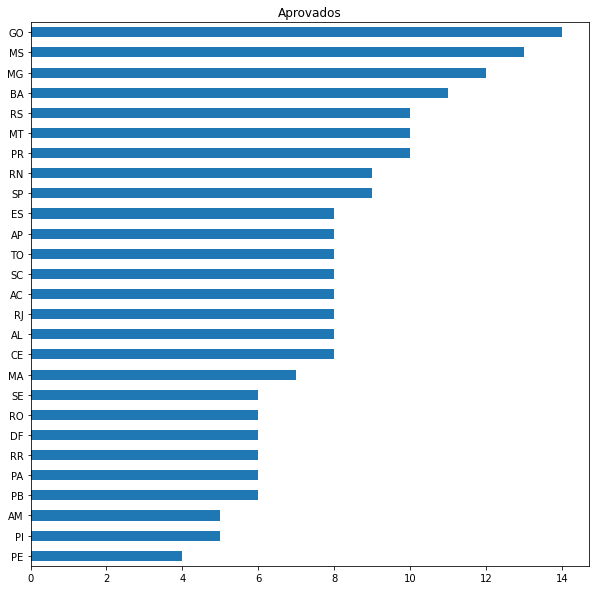

In [23]:
plt.figure(figsize=(10, 10))
df[df.aprovado].estado.value_counts().sort_values(ascending=True).plot(kind='barh')
plt.title('Aprovados')
plt.plot()

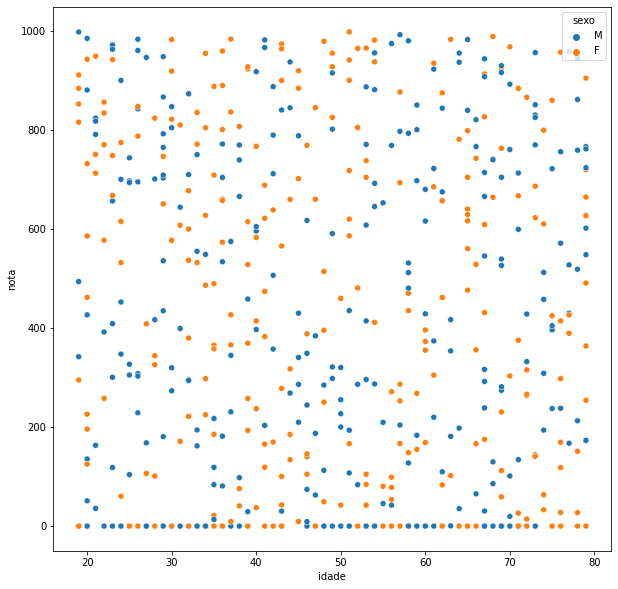

In [9]:
# df.plot(kind='scatter', x='idade', y='nota', color='aprovado', alpha=.7)
# plt.title('Notas por idade')
# plt.show()
plt.figure(figsize=(10,10))
sns.scatterplot(data=df, x='idade', y='nota', hue='sexo')
plt.show()

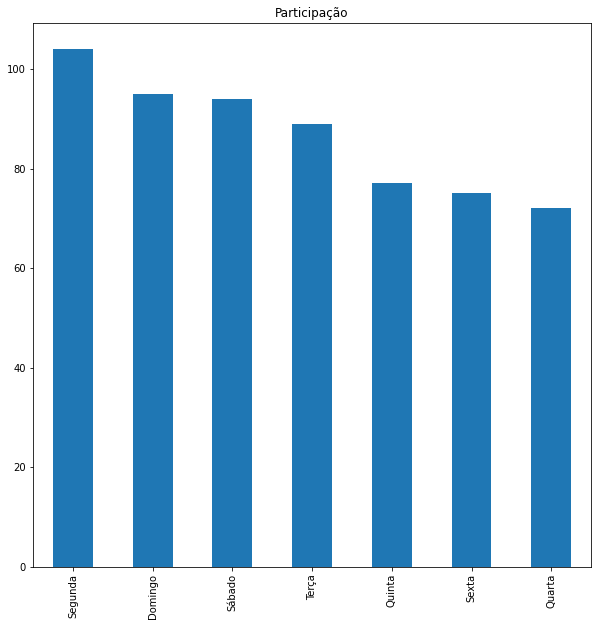

In [10]:
plt.figure(figsize=(10, 10))
df.dia_semana.value_counts().plot(kind='bar')
plt.title('Participação');

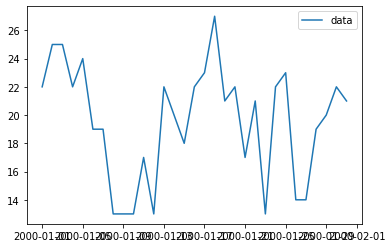

In [11]:
sns.lineplot(data=df.data.value_counts().to_frame())

''

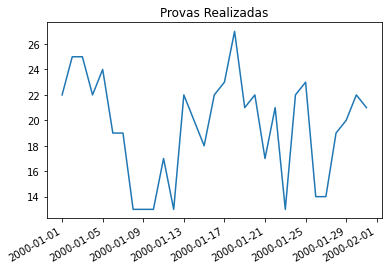

In [12]:
df.data.value_counts().plot()
plt.title('Provas Realizadas')
;

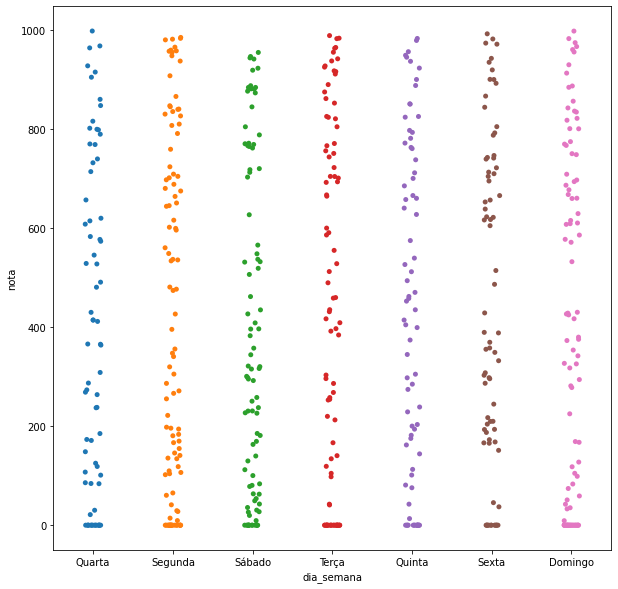

In [13]:
plt.figure(figsize=(10,10))
# sns.swarm(data=df, x='dia_semana', y='nota');
sns.stripplot(data=df, x='dia_semana', y='nota');

In [14]:
df.sort_values('nota', ascending=False)\
  .iloc[:100]\
  .to_csv('top100_notas.csv')
  # .head()